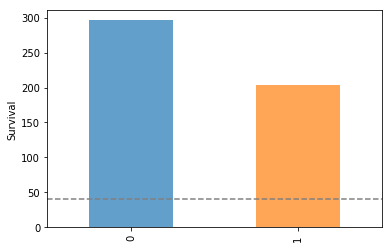

In [9]:
import acquire
import prepare
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Acquire and prep the data
df = acquire.get_titanic_data()
df = prepare.prep_titanic_data(df)

# Remove NaNs
df = df.dropna()

# Split the data
train, test = train_test_split(df, test_size=.3, random_state=123, stratify=df[['survived']])

# Set mean survival rate line
survival_rate = train.survived.mean()*100

p = train.survived.value_counts().plot(kind="bar", alpha=.7)
p.set_ylabel('Survival')
p.axhline(survival_rate, ls='--', color='gray')

In [10]:
train.survived.value_counts()

0    296
1    203
Name: survived, dtype: int64

In [11]:
# Manually calculating the survival rate = those who survived divided by those who did not
203/296

0.6858108108108109

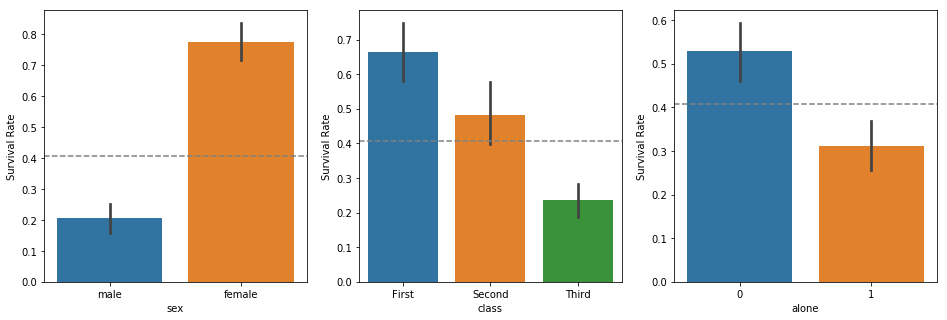

In [16]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i])
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

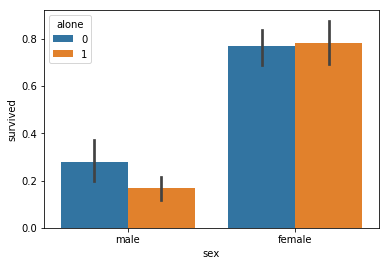

In [17]:
sns.barplot('sex', 'survived', data=train, hue='alone')

In [18]:
train.groupby(['sex','alone'])['survived'].count()

sex     alone
female  0        112
        1         65
male    0        107
        1        215
Name: survived, dtype: int64

In [ ]:
df_family = train[train['alone']==0]